In [149]:
import pandas as pd
import unidecode

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

In [150]:
df = pd.read_csv(r'C:\Users\gjrre\Python Files\Datasets\ds_salaries.csv')

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [151]:
df1 = df.copy(deep = True)

df1['cat_job_title'] = df1['job_title'].astype('category')
df1['cat_job_title'] = df1['cat_job_title'].cat.codes

df1['cat_experience_level'] = df1['experience_level'].astype('category')
df1['cat_experience_level'] = df1['cat_experience_level'].cat.codes

In [152]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,cat_job_title,cat_experience_level
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,84,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,66,2
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,66,2
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,47,3
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,47,3


In [153]:
X = df1[['cat_job_title', 'cat_experience_level']]

X

,cat_job_title,cat_experience_level
0,84,3
1,66,2
2,66,2
3,47,3
4,47,3
...,...,...
3750,47,3
3751,84,2
3752,47,0
3753,17,0


In [154]:
y = df1['salary_in_usd']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
lr = LinearRegression()

In [156]:
lr.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred_train = lr.predict(X_train)

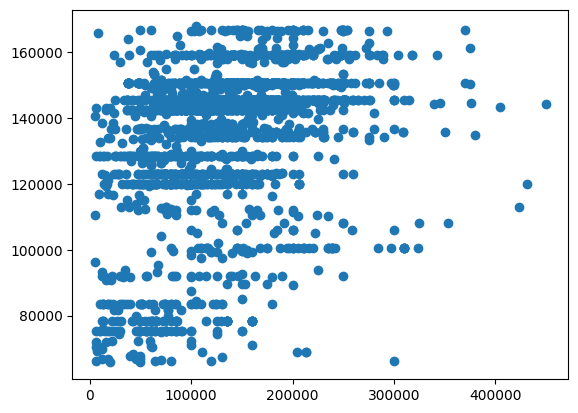

In [158]:
plt.scatter(y_train, y_pred_train)
plt.show()

In [159]:
r2_score(y_train, y_pred_train)

0.11959732552891811

# Model results are poor. Revisiting data to find another approach. Too many unique values

In [160]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [161]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [162]:
df['employment_type'].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [163]:
df['job_title'].value_counts()[:7]

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Name: count, dtype: int64

In [164]:
df_ds = df.copy(deep = True)

df_ds.company_size = df_ds.company_size.replace({'S':1 ,'M': 2, 'L': 3})
df_ds['remote_ratio'] = df_ds['remote_ratio'].replace({100: 3, 50: 2, 0: 1})
df_ds['experience_level'] = df_ds['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df_ds['employment_type'] = df_ds['employment_type'].replace({'FL':1 ,'PT': 2, 'FT': 3, 'CT': 4,})
df_ds = df_ds.drop(columns = ['salary', 'salary_currency'])

df_ds

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,3,Principal Data Scientist,85847,ES,3,ES,3
1,2023,2,4,ML Engineer,30000,US,3,US,1
2,2023,2,4,ML Engineer,25500,US,3,US,1
3,2023,3,3,Data Scientist,175000,CA,3,CA,2
4,2023,3,3,Data Scientist,120000,CA,3,CA,2
...,...,...,...,...,...,...,...,...,...
3750,2020,3,3,Data Scientist,412000,US,3,US,3
3751,2021,2,3,Principal Data Scientist,151000,US,3,US,3
3752,2020,1,3,Data Scientist,105000,US,3,US,1
3753,2020,1,4,Business Data Analyst,100000,US,3,US,3


In [165]:
job = ["Data Engineer", "Data Scientist","Data Analyst", "Machine Learning Engineer" , "Analytics Engineer", "Data Architect", "Research Scientist"]
new = [col for col in df.index if df.job_title[col] in job]

df_ds = df_ds.loc[new,]
df_ds = df_ds.reset_index()
del df_ds["index"]
df_ds.shape

(3067, 9)

In [166]:
df_ds['job_title'] = df_ds['job_title'].astype('category')
df_ds['job_title'] = df_ds['job_title'].cat.codes

df_ds['employee_residence'] = df_ds['employee_residence'].astype('category')
df_ds['employee_residence'] = df_ds['employee_residence'].cat.codes

df_ds['company_location'] = df_ds['company_location'].astype('category')
df_ds['company_location'] = df_ds['company_location'].cat.codes

df_ds

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,3,4,175000,9,3,8,2
1,2023,3,3,4,120000,9,3,8,2
2,2023,3,3,4,219000,9,1,8,2
3,2023,3,3,4,141000,9,1,8,2
4,2023,3,3,4,147100,56,1,52,2
...,...,...,...,...,...,...,...,...,...
3062,2020,3,3,5,45618,27,3,24,1
3063,2021,2,3,4,119059,51,3,28,2
3064,2021,2,3,3,28369,39,2,36,3
3065,2020,3,3,4,412000,56,3,52,3


In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import numpy as np

scaler = MinMaxScaler()

y = df_ds['salary_in_usd']
X = df_ds.drop(['salary_in_usd'],axis=1)
m = X
X = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y = np.log(y)


def regression_(x, y):
    rf=RandomForestRegressor()
    lg = LGBMRegressor()
    kn = KNeighborsRegressor()
    et = ExtraTreeRegressor()
    gb = GradientBoostingRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()

    algos = [rf,lg , kn, et, gb, dt,xgb]
    algos_names = ["Random Forest","LGBM", 'KNeighbors', 'ExtraTree', 'GradientBoosting',
                   'DecisionTree','XGB']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

    r_score = []
    mse = []
    mae = []

    result = pd.DataFrame(columns=['R_square', 'MSE', 'MAE'], index=algos_names)

    for algo in algos:
        pred = algo.fit(x_train, y_train).predict(x_test)
        r_score.append(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred) ** .5)
        mae.append(mean_absolute_error(y_test, pred))

    result.R_square = r_score
    result.MSE = mse
    result.MAE = mae

    return result.sort_values('R_square', ascending=False)

In [168]:
regression_(X, y)

C:\Users\gjrre\AppData\Local\Temp\ipykernel_24732\1367840442.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred = algo.fit(x_train, y_train).predict(x_test)
C:\Users\gjrre\Python Files\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gjrre\Python Files\envs\mlenv\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_square,MSE,MAE
LGBM,0.588392,0.336808,0.261895
GradientBoosting,0.570861,0.343906,0.266855
Random Forest,0.560934,0.347861,0.269316
XGB,0.557622,0.349170,0.271492
ExtraTree,0.494016,0.373429,0.280327
KNeighbors,0.459639,0.385906,0.295855
DecisionTree,0.366703,0.417776,0.293072


# Better results than before. Next will do hyperparameter testing

In [177]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state = 42)
lgbm_model = LGBMRegressor()

lgbm_params = { 
    'n_estimators': [100, 500],
    'subsample': [1,0.5],
    'max_depth' : [3,8],
    "learning_rate": [0.01,0.1]
}

lgbm_best_grid = GridSearchCV(lgbm_model,lgbm_params, cv = 5,n_jobs = -1, verbose = True).fit(X,y)

final = lgbm_model.set_params(**lgbm_best_grid.best_params_,random_state = 17).fit(X,y)
final_test = final.predict(x_test)
r2_score(y_test,final_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\gjrre\Python Files\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gjrre\Python Files\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6137474678979243

In [184]:
print("best parameters :", lgbm_best_grid.best_params_)

best parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
